# 世界人口与GDP可视化

## 摘要

本报告通过对世界人口与经济数据的分析，探讨了主要国家的人口与GDP变化趋势，并结合可视化图表展示了相关的全球和国家级数据。数据来源包括世界银行提供的全球人口、GDP以及人均GDP数据，结合Natural Earth提供的地理信息数据，利用Python及其相关数据处理库（如Pandas、GeoPandas、Matplotlib和Seaborn）进行数据清洗、整合和可视化分析。

本报告的关键分析包括：世界人口分布与变化趋势、GDP总量与人均GDP的对比、人口金字塔与年龄结构分析、人口与GDP相关性分析。

本次报告认为：

中国面临人口老龄化压力：随着出生率的下降和老龄化的加剧，中国将面临劳动力人口的减少，这可能影响其未来的经济增长潜力。

全球经济格局变化：尽管中国和印度的总人口庞大，但在人均GDP方面，欧美国家的经济水平依然遥不可及，这显示出中国和印度仍需要在提高生产力、创新能力和经济效率方面作出努力。

政策建议：为了应对老龄化社会和劳动力下降的趋势，中国需要加强生育率政策、提高劳动力市场的活力，并促进创新驱动的发展模式，以实现经济的可持续增长。

## 数据获取
地理数据来自[naturalearth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/ "naturalearth")，包含国家名，ISO简称，地理等数据。

世界人口数据来自[世界银行人口数据](https://data.worldbank.org/indicator/SP.POP.TOTL?view=map)，部分地区数据是缺失的如台湾。

世界GDP数据来自[世界银行GDP数据](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)和[世界银行人均GDP数据](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=map)，部分地区在一些年份同样有缺失。

有的数据包含非政府组织，使用[ISO](https://hrssit.cn/info/1984.html)代码排除即可。

中国人口结构数据来自国家统计局的[国家统计年鉴](https://www.stats.gov.cn/sj/pcsj/rkpc/7rp/zk/indexch.htm)

由于数据太多，只展示前五行前五列。

In [126]:
import geopandas as gpd
import pandas as pd
# 加载世界地图数据
world = gpd.read_file('./ne_110m_admin_0_countries.shp')
data_population = pd.read_csv('./population.csv')
data_gdp = pd.read_csv('./GDP.csv')
data_gdpave = pd.read_csv('./人均GDP.csv')
ISO = pd.read_excel('./ISO.xls')
print(world.iloc[0:5, 0:5])
print(data_population.iloc[0:5, 0:5])
print(data_gdp.iloc[0:5, 0:5])
print(data_gdpave.iloc[0:5, 0:5])

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3
0  Admin-0 country          1          6                         Fiji    FJI
1  Admin-0 country          1          3  United Republic of Tanzania    TZA
2  Admin-0 country          1          7               Western Sahara    SAH
3  Admin-0 country          1          2                       Canada    CAN
4  Admin-0 country          1          2     United States of America    US1
                  Country Name Country Code         1960         1961  \
0                        Aruba          ABW      54922.0      55578.0   
1  Africa Eastern and Southern          AFE  130072080.0  133534923.0   
2                  Afghanistan          AFG    9035043.0    9214083.0   
3   Africa Western and Central          AFW   97630925.0   99706674.0   
4                       Angola          AGO    5231654.0    5301583.0   

          1962  
0      56320.0  
1  137171659.0  
2    9404406.0  
3  101854756.0  
4    5354310.0

## 可视化

### 世界人口

先看看世界人口的数据

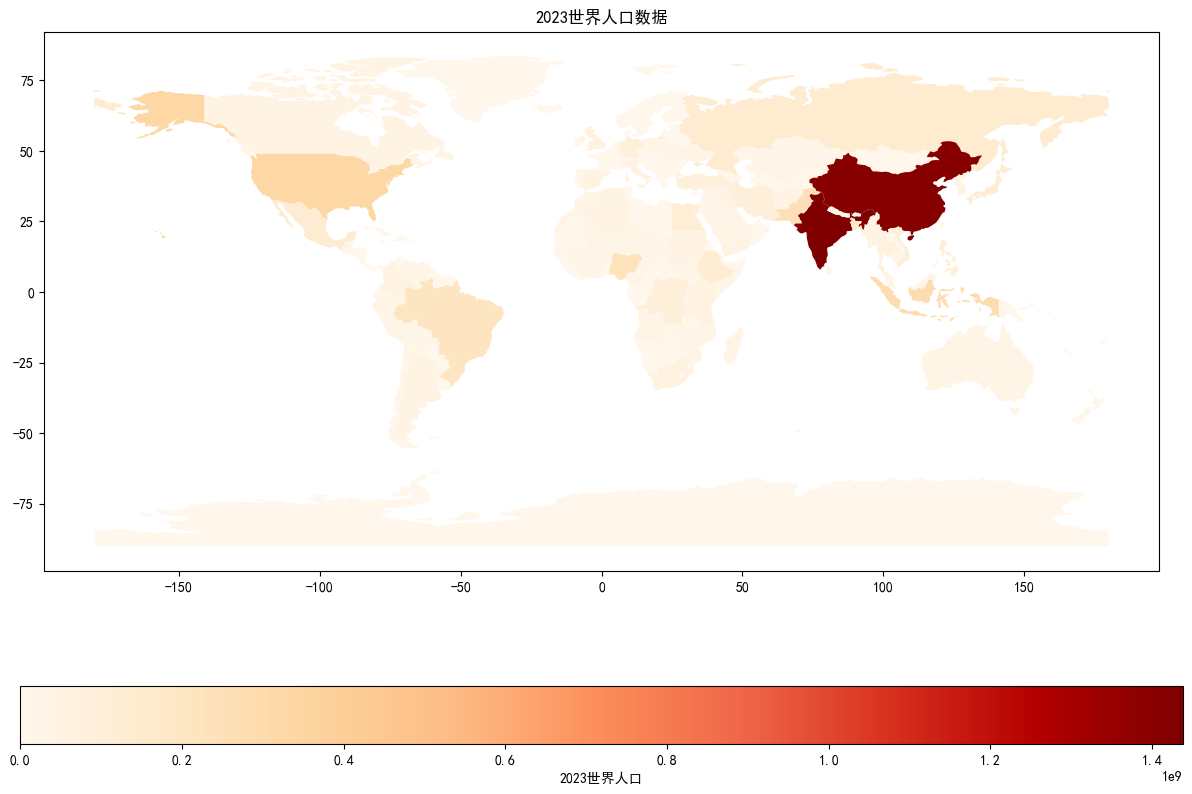

In [127]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
datapop_2023 = data_population[['Country Name', 'Country Code', '2023']]
# 合并世界地图数据和 2023 年人口数据
worldpop2023_merged = world.merge(datapop_2023, how="left", left_on="ISO_A3", right_on="Country Code")
# 世界地图数据中存在部分地区如台湾人口数据为空，这里将这部分数据填充为 0
worldpop2023_merged['2023'] = worldpop2023_merged['2023'].fillna(0)
# 绘制热力图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worldpop2023_merged.plot(column='2023', ax=ax, legend=True,
           legend_kwds={'label': "2023世界人口",
                        'orientation': "horizontal"},
           cmap='OrRd')

plt.title("2023世界人口数据")
plt.show()

中国和印度人口遥遥邻先，以至于难以区分其他国家。

所以我们再看看世界主要国家的人口变化。

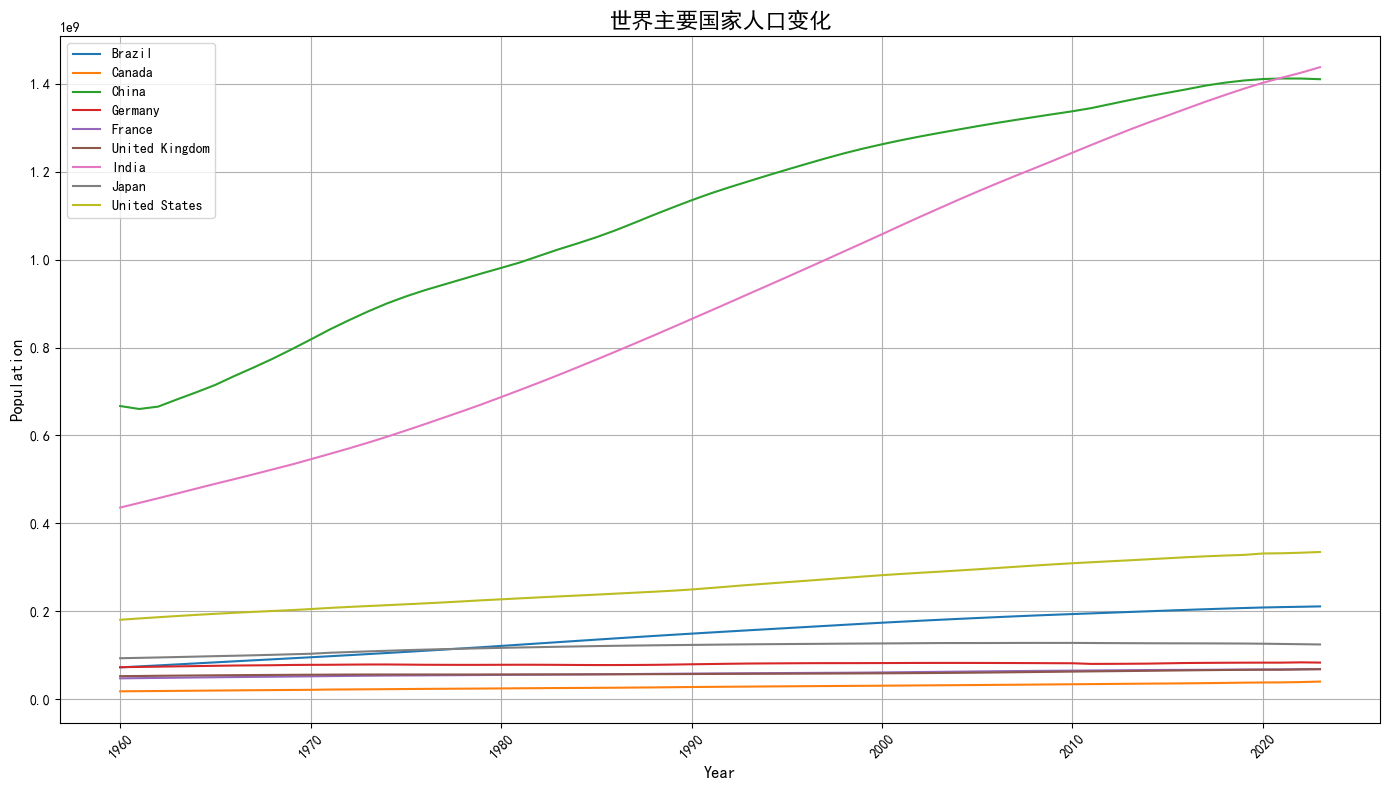

In [128]:
# 选择一些主要国家
countries = ['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada']
#  'Russian Federation',
# 提取这些国家的数据
selected_datapop = data_population[data_population['Country Name'].isin(countries)]

# 绘制每个国家的人口变化折线图
plt.figure(figsize=(14, 8))

for i in range(len(selected_datapop)):
    country_data = selected_datapop.iloc[i]
    years = country_data.index[2:]
    population = country_data.values[2:]
    plt.plot(years, population, label=country_data['Country Name'])

# 设置图表标题和标签
plt.title('世界主要国家人口变化', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)

# 设置横坐标的间隔，显示每10年的数据
plt.xticks(years[::10], rotation=45)

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

印度大概在2022年人口超过中国，中国近年出现了人口下降情况。国家均是发达国家，人口明显少于两国，而且增长缓慢甚至降低。

我认为按照这个趋势，中国在成为发达国家的过程中，人口也会慢慢减少，直到达成市场-人口平衡。

### 世界GDP

除了人口，经济也是衡量一个国家的重要指标，因此对GDP进行分析。

先绘制世界GDP总量和人均GDP热力图。

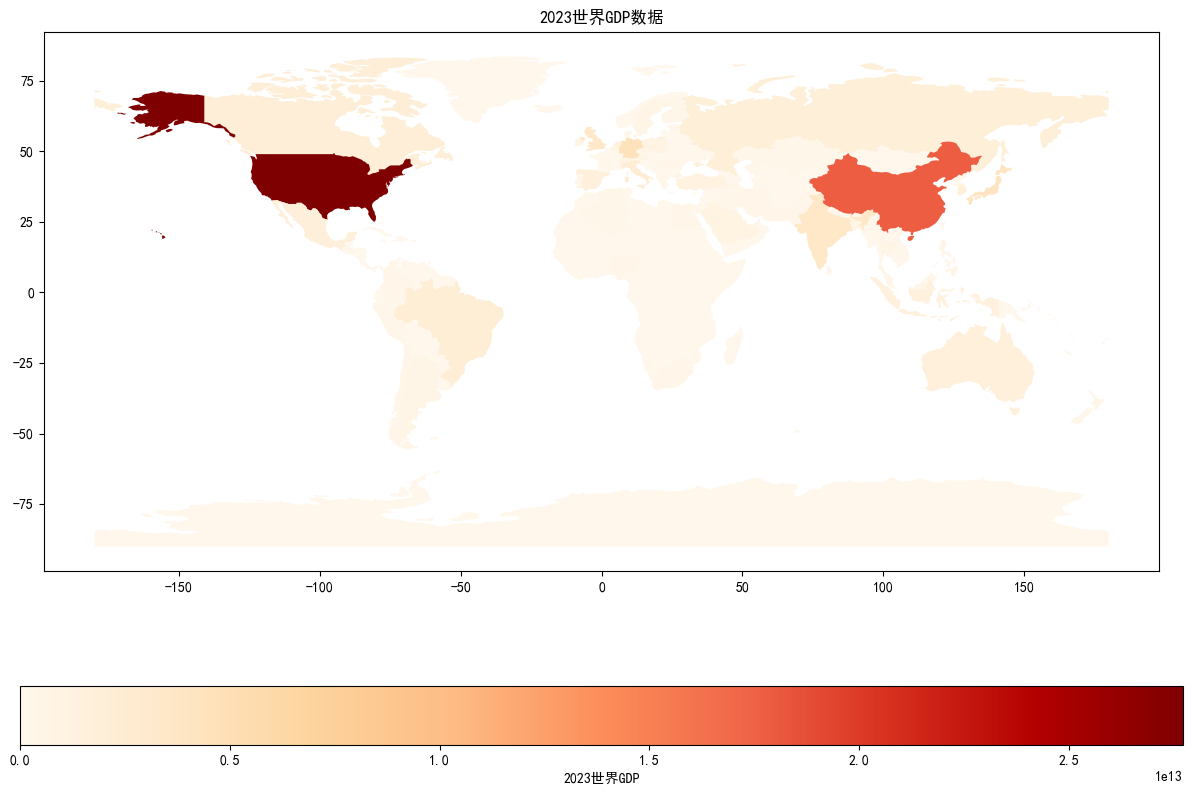

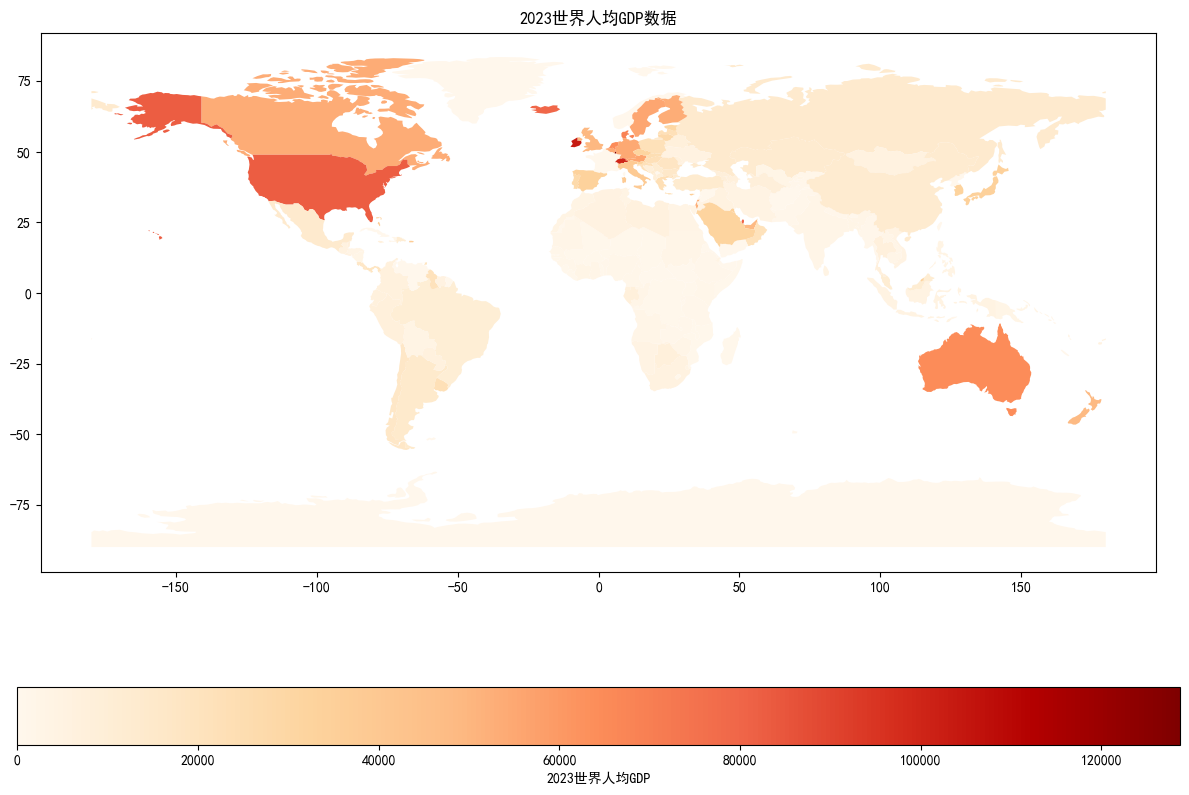

In [129]:
datagdp_2023 = data_gdp[['Country Name', 'Country Code', '2023']]
worldgdp2023_merged = world.merge(datagdp_2023, how="left", left_on="ISO_A3", right_on="Country Code")
worldgdp2023_merged['2023'] = worldgdp2023_merged['2023'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worldgdp2023_merged.plot(column='2023', ax=ax, legend=True,
           legend_kwds={'label': "2023世界GDP",
                        'orientation': "horizontal"},
           cmap='OrRd')

plt.title("2023世界GDP数据")
plt.show()

datagdpave_2023 = data_gdpave[['Country Name', 'Country Code', '2023']]
worldgdpave2023_merged = world.merge(datagdpave_2023, how="left", left_on="ISO_A3", right_on="Country Code")
worldgdpave2023_merged['2023'] = worldgdpave2023_merged['2023'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worldgdpave2023_merged.plot(column='2023', ax=ax, legend=True,
           legend_kwds={'label': "2023世界人均GDP",
                        'orientation': "horizontal"},
           cmap='OrRd')
plt.title("2023世界人均GDP数据")
plt.show()

In [130]:
from pyecharts.charts import ThemeRiver
from pyecharts import options as opts
data_selected_gdp = data_gdp[data_gdp['Country Name'].isin(countries)]
# 去除Country Code列
data_selected_gdp = data_selected_gdp.drop(columns=['Country Code'])
data_list = []

for country in countries:
    for year in range(1990, 2024):  # 选择1990到2023年
        value = data_selected_gdp[data_selected_gdp['Country Name'] == country][str(year)].values[0]
        if pd.notna(value):  # 忽略缺失数据
            data_list.append([str(year), value, country])

theme_river = ThemeRiver()

theme_river.add(
    series_name="GDP Flow",
    data=data_list,
    label_opts=opts.LabelOpts(is_show=True),
    singleaxis_opts=opts.SingleAxisOpts(type_="time"),

)

# 设置全局配置项
theme_river.set_global_opts(
    title_opts=opts.TitleOpts(title="主要国家GDP河流图 (1990-2023)"),
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c}"),
    yaxis_opts=opts.AxisOpts(type_="value", name="GDP in USD"),
)
theme_river.render_notebook()

在总GDP上中美遥遥领先，但是在人均上GDP还是以欧美靠前。可以认为中国的GDP总量中人口因素较大。而人口大国印度在GDP总量和人均上都不突出，

再看看主要国家GDP和人口气泡图，也印证了上面这段话。

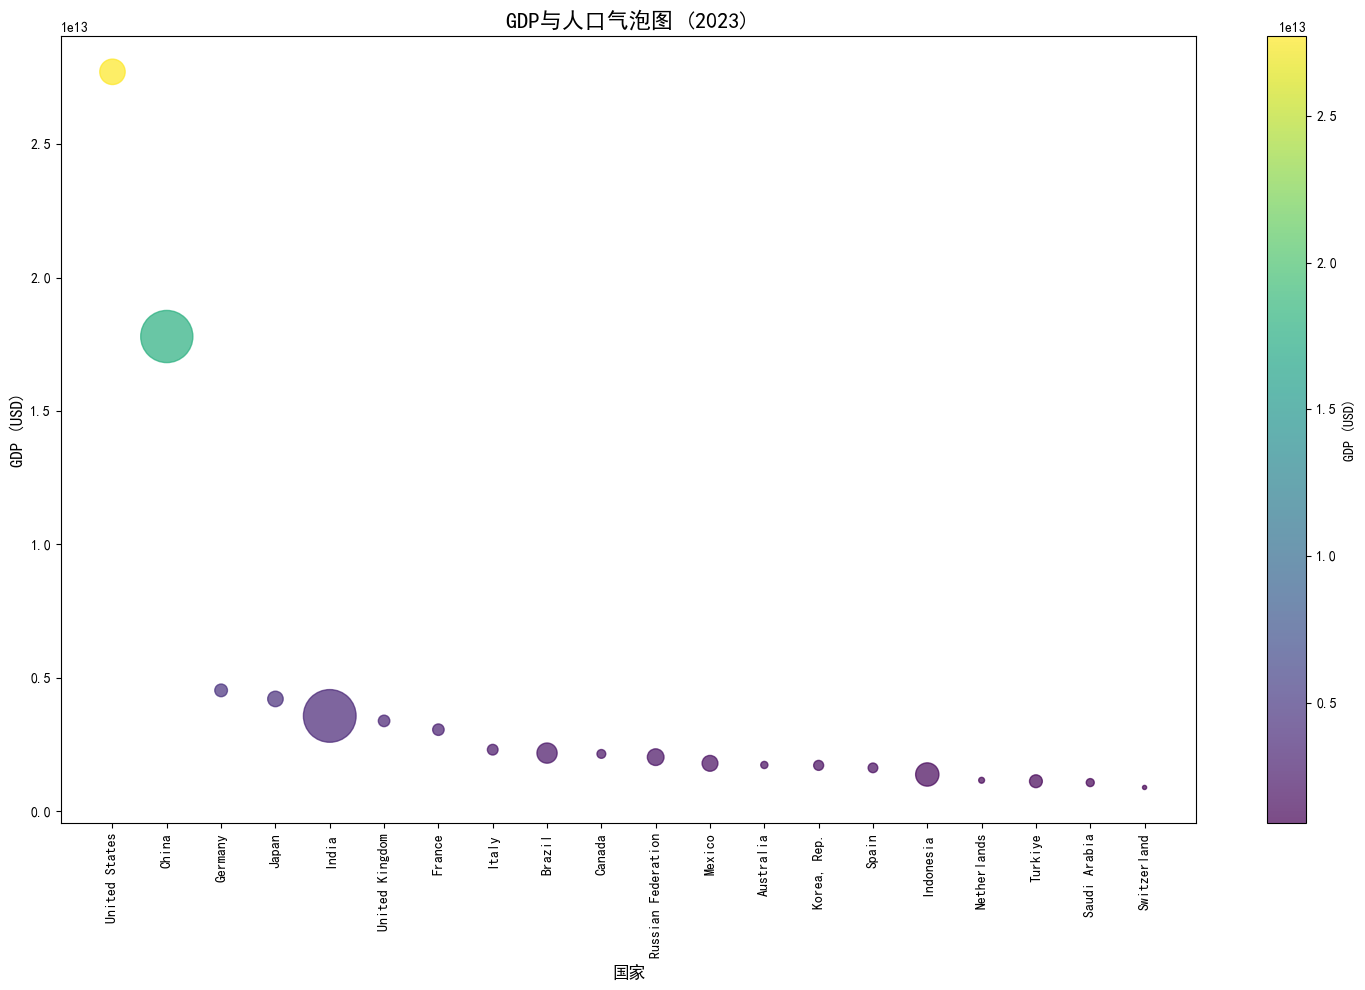

In [131]:
datapop_gdp_2023 = pd.merge(datapop_2023, datagdp_2023, on='Country Code', how='inner', suffixes=('_pop', '_gdp'))
datapop_gdp_2023 = pd.merge(datapop_gdp_2023, ISO, on='Country Code', how='inner')
datapop_gdp_2023 = datapop_gdp_2023[datapop_gdp_2023['2023_gdp'].notna() & (datapop_gdp_2023['2023_gdp'] > 0) & datapop_gdp_2023['2023_pop'].notna() & (datapop_gdp_2023['2023_pop'] > 0)]

top_20_gdp = datapop_gdp_2023.sort_values(by='2023_gdp', ascending=False).head(20)
# 绘制人均GDP与人口气泡图
plt.figure(figsize=(15, 10))

# 设置气泡的大小，大小与人口数量成正比
bubble_size = top_20_gdp['2023_pop'] / 1000000  # 控制气泡大小，使其可视化

# 设置气泡的颜色，根据GDP来设置，颜色从低到高
bubble_color = top_20_gdp['2023_gdp']

# 绘制气泡图
scatter = plt.scatter(top_20_gdp['Country Name_pop'], 
                      top_20_gdp['2023_gdp'], 
                      s=bubble_size, 
                      c=bubble_color, 
                      alpha=0.7, 
                      cmap='viridis')

# 设置标题和标签
plt.title('GDP与人口气泡图 (2023)', fontsize=16)
plt.xlabel('国家', fontsize=12)
plt.ylabel('GDP (USD)', fontsize=12)

# 旋转x轴标签，方便查看国家
plt.xticks(rotation=90)

# 添加颜色条
plt.colorbar(scatter, label='GDP (USD)')

# 显示气泡图
plt.tight_layout()
plt.show()

最后分析两者相关性，可以用相关热力矩阵表示。

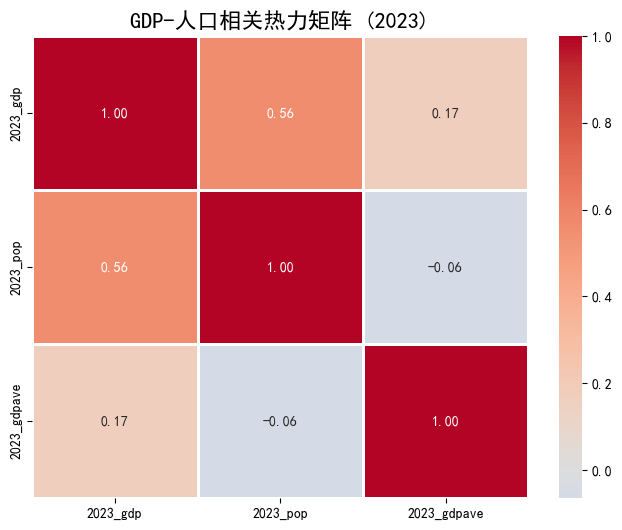

In [132]:
import seaborn as sns

datapop_gdp_merged = pd.merge(datapop_gdp_2023, data_gdpave[['Country Code', '2023']], on='Country Code', how='inner')
datapop_gdp_merged.rename(columns={'2023': '2023_gdpave'}, inplace=True)
# 保证数据中没有缺失值
datapop_gdp_merged = datapop_gdp_merged.dropna(subset=['2023_gdp', '2023_pop', '2023_gdpave'])

# 提取GDP和人口数据
gdp_population_gdpave_data = datapop_gdp_merged[['2023_gdp', '2023_pop', '2023_gdpave']]


# 计算相关性矩阵
correlation_matrix = gdp_population_gdpave_data.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)

# 设置标题
plt.title('GDP-人口相关热力矩阵 (2023)', fontsize=16)

# 显示热力图
plt.show()

似乎可以看出人口和GDP之间相关性其实不算强，如果要对经济进行分析，应该考虑更多的因素。

### 中国人口

绘制年龄金字塔图查看中国人口结构。

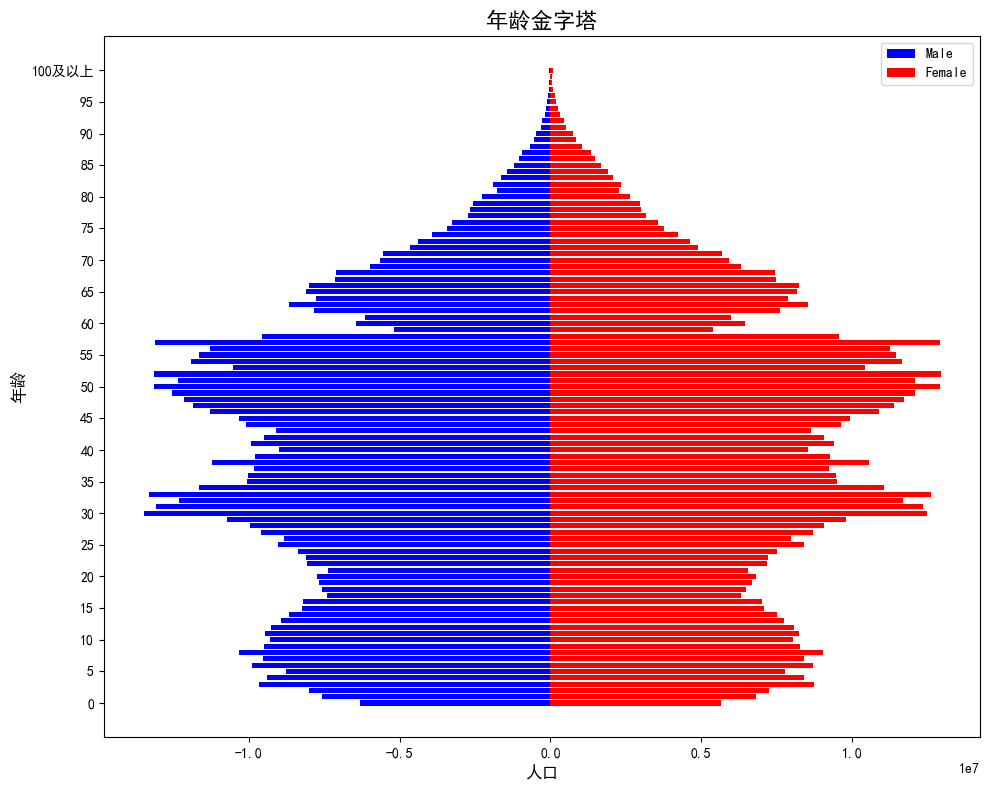

In [135]:
df = pd.read_excel('./中国年龄结构.xlsx')
df['年龄'] = df['年龄'].astype(str)

# 设置图形大小
plt.figure(figsize=(10, 8))

# 绘制男性人口的水平条形图，使用负值让男性人口显示在左侧
plt.barh(df['年龄'], -df['男'], color='blue', label='Male')

# 绘制女性人口的水平条形图，女性人口显示在右侧
plt.barh(df['年龄'], df['女'], color='red', label='Female')

# 设置图表标题和标签
plt.title('年龄金字塔', fontsize=16)
plt.xlabel('人口', fontsize=12)
plt.ylabel('年龄', fontsize=12)

# 设置 x 轴范围，使得左右两侧的条形图适当分开
plt.xlim(-max(df['男']) * 1.1, max(df['女']) * 1.1)
plt.yticks(range(0, df['年龄'].count(), 5), df['年龄'][::5])
# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()


出生人口较少，年龄段人数最多，可见我国人口总量较高但是增速下降较为明显，劳动力已经出现下降，呈现了老龄化和低生育率的趋势。

面对这种情况，可以进一步优化政策设计，例如通过更完善的财政补贴、减税、育儿假期、带薪育儿等措施，鼓励年轻家庭生育，提供更多的生育、育儿和教育支持，尤其是在城市和农村的差距较大的地区。通过建设更多的托儿所、幼儿园，并在教育费用上给予家庭一定的补助。完善养老金制度，考虑将现有的养老金制度与医疗保险、长期护理保险等结合，逐步提高养老金的覆盖面，保障老龄化社会的基本生活需求。

## 总结

本报告通过多维度的数据分析，结合全球人口和GDP的变化趋势，深入探讨了世界主要国家的经济与人口现状，以及其相互关系。通过使用数据可视化技术，展示了全球和特定国家（如中国、印度等）的经济发展轨迹和人口变动，进一步揭示了当前全球经济和人口结构的一些重要趋势和挑战。

在全球人口分析部分，使用了来自世界银行的2023年人口数据，结合GeoPandas和Matplotlib等工具绘制了各国人口分布的热力图。从中可以明显看到，中国和印度的庞大人口规模占据了全球总人口的显著比例，而其他发达国家（如美国、欧洲国家）则呈现出人口增长缓慢甚至下降的趋势。这一现象不仅反映了全球人口不均衡的特点，也表明了不同国家在应对人口增长与老龄化问题上的差异。

接着，深入分析了全球GDP总量和人均GDP的数据，发现尽管中美两国在GDP总量上遥遥领先，但在衡量经济发展水平的人均GDP上，欧美等发达国家依然处于前列。中国的GDP总量虽然位居全球第二，但其庞大的人口基数对总量的贡献较大，因此在按人均计算时，其经济水平仍然不及其他一些发达国家。这一现象提示我们，中国仍然面临经济结构调整和高质量发展的挑战，未来的增长可能更依赖于创新驱动和结构优化。

在人口结构方面，特别是对中国的人口金字塔图进行了详细分析。结果显示，中国的人口正在逐步老龄化，劳动力人口的比例已经出现下降，并且生育率持续低迷。这一趋势不仅对社会保障体系、劳动力市场产生了深远影响，也对中国未来的经济发展构成了潜在的挑战。随着老龄化问题的加剧，如何有效应对人口结构变化，提升劳动生产率，推动科技创新和产业升级，将是中国政府面临的重要议题。

在最后的分析中，对中国的人口与GDP进行了相关性分析，发现中国人口与GDP之间存在较强的正相关关系，表明中国庞大的人口基数对其GDP总量起到了重要支撑作用。然而，随着人口增速放缓，劳动力供给减少，未来的经济增长将更多依赖于科技创新、资本积累和结构性改革。因此，如何实现经济从“要素驱动”向“创新驱动”转型，已成为中国经济持续增长的关键。